In [1]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from math import pi

In [77]:
def grover_circuit(n, marked_items):
    oracle = QuantumCircuit(n, name="oracle")
    #oracle.diagonal([1 if i in marked_items else -1 for i in range(2**n)])
    for item in marked_items:
        oracle.z(item)

    diffusion = QuantumCircuit(n, name="diffusion")
    diffusion.h(range(n))
    diffusion.append(oracle.to_gate(), range(n))
    diffusion.h(range(n))

    grover_circ = QuantumCircuit(n, n)
    grover_circ.h(range(n))

    iterations = 5

    for _ in range(iterations):
        grover_circ.append(oracle, range(n))
        grover_circ.append(diffusion, range(n))
    
    grover_circ.measure(range(n), range(n))
    
    return (grover_circ,grover_circ.draw(output="mpl"))

In [78]:
# Lista de ejemplo

#Lista original
#lista = [25, 37, 47, 29, 8, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la primera posición
lista = [8, 37, 47, 29, 25, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la última posición
#lista = [25, 37, 47, 29, 22, 12, 44, 30, 24, 33, 15, 39, 46, 5, 8]
# Valor a buscar
k = 8

In [79]:
# Encontrar la posición del valor k en la lista
posicion_k = lista.index(k)

In [80]:
# Longitud de bits necesaria para representar la lista
num_bits = len(bin(max(lista))) - 2

In [81]:
# Crear el circuito cuántico de Grover
(circuito_grover,draw) = grover_circuit(num_bits, [posicion_k])

In [82]:
# Simular el circuito cuántico en un simulador
simulador = Aer.get_backend('qasm_simulator')
conteos = simulador.run(transpile(circuito_grover, simulador)).result().get_counts()

Posición de 8 en la lista:


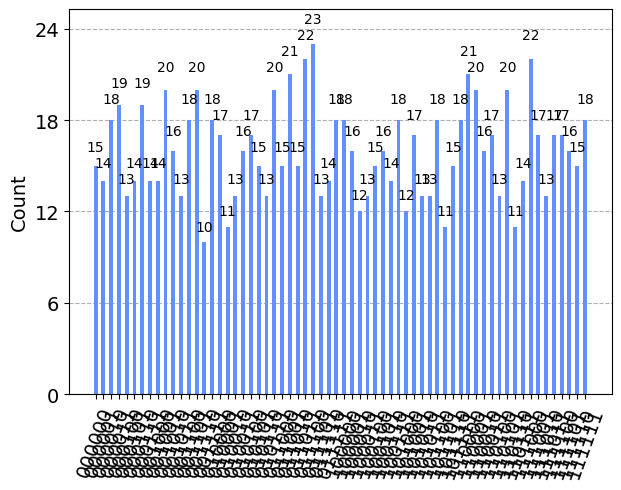

In [83]:
# Imprimir resultados
print("Posición de {} en la lista:".format(k))
plot_histogram(conteos)

In [84]:
# Encontrar la posición más probable
posicion_mas_probable = int(max(conteos, key=conteos.get), 2)

# Imprimir resultados
print("Posición de {} en la lista:".format(k), posicion_mas_probable)


Posición de 8 en la lista: 28


In [85]:
# Mostrar bits correspondientes a cada elemento en la lista
for estado, frecuencia in conteos.items():
    decimal = int(estado, 2)
    print(f"Bits para {decimal}: {estado}")

Bits para 24: 011000
Bits para 9: 001001
Bits para 17: 010001
Bits para 8: 001000
Bits para 5: 000101
Bits para 46: 101110
Bits para 50: 110010
Bits para 37: 100101
Bits para 14: 001110
Bits para 59: 111011
Bits para 28: 011100
Bits para 12: 001100
Bits para 61: 111101
Bits para 35: 100011
Bits para 56: 111000
Bits para 58: 111010
Bits para 15: 001111
Bits para 38: 100110
Bits para 49: 110001
Bits para 47: 101111
Bits para 6: 000110
Bits para 2: 000010
Bits para 43: 101011
Bits para 53: 110101
Bits para 10: 001010
Bits para 63: 111111
Bits para 33: 100001
Bits para 32: 100000
Bits para 39: 100111
Bits para 16: 010000
Bits para 20: 010100
Bits para 18: 010010
Bits para 44: 101100
Bits para 52: 110100
Bits para 3: 000011
Bits para 55: 110111
Bits para 0: 000000
Bits para 4: 000100
Bits para 45: 101101
Bits para 51: 110011
Bits para 36: 100100
Bits para 60: 111100
Bits para 13: 001101
Bits para 25: 011001
Bits para 27: 011011
Bits para 19: 010011
Bits para 26: 011010
Bits para 21: 010101


In [86]:
bits = [bin(x)[2:] for x in lista]
print(bits)

['1000', '100101', '101111', '11101', '11001', '1100', '101100', '11110', '11000', '100001', '1111', '100111', '101110', '101', '10110']


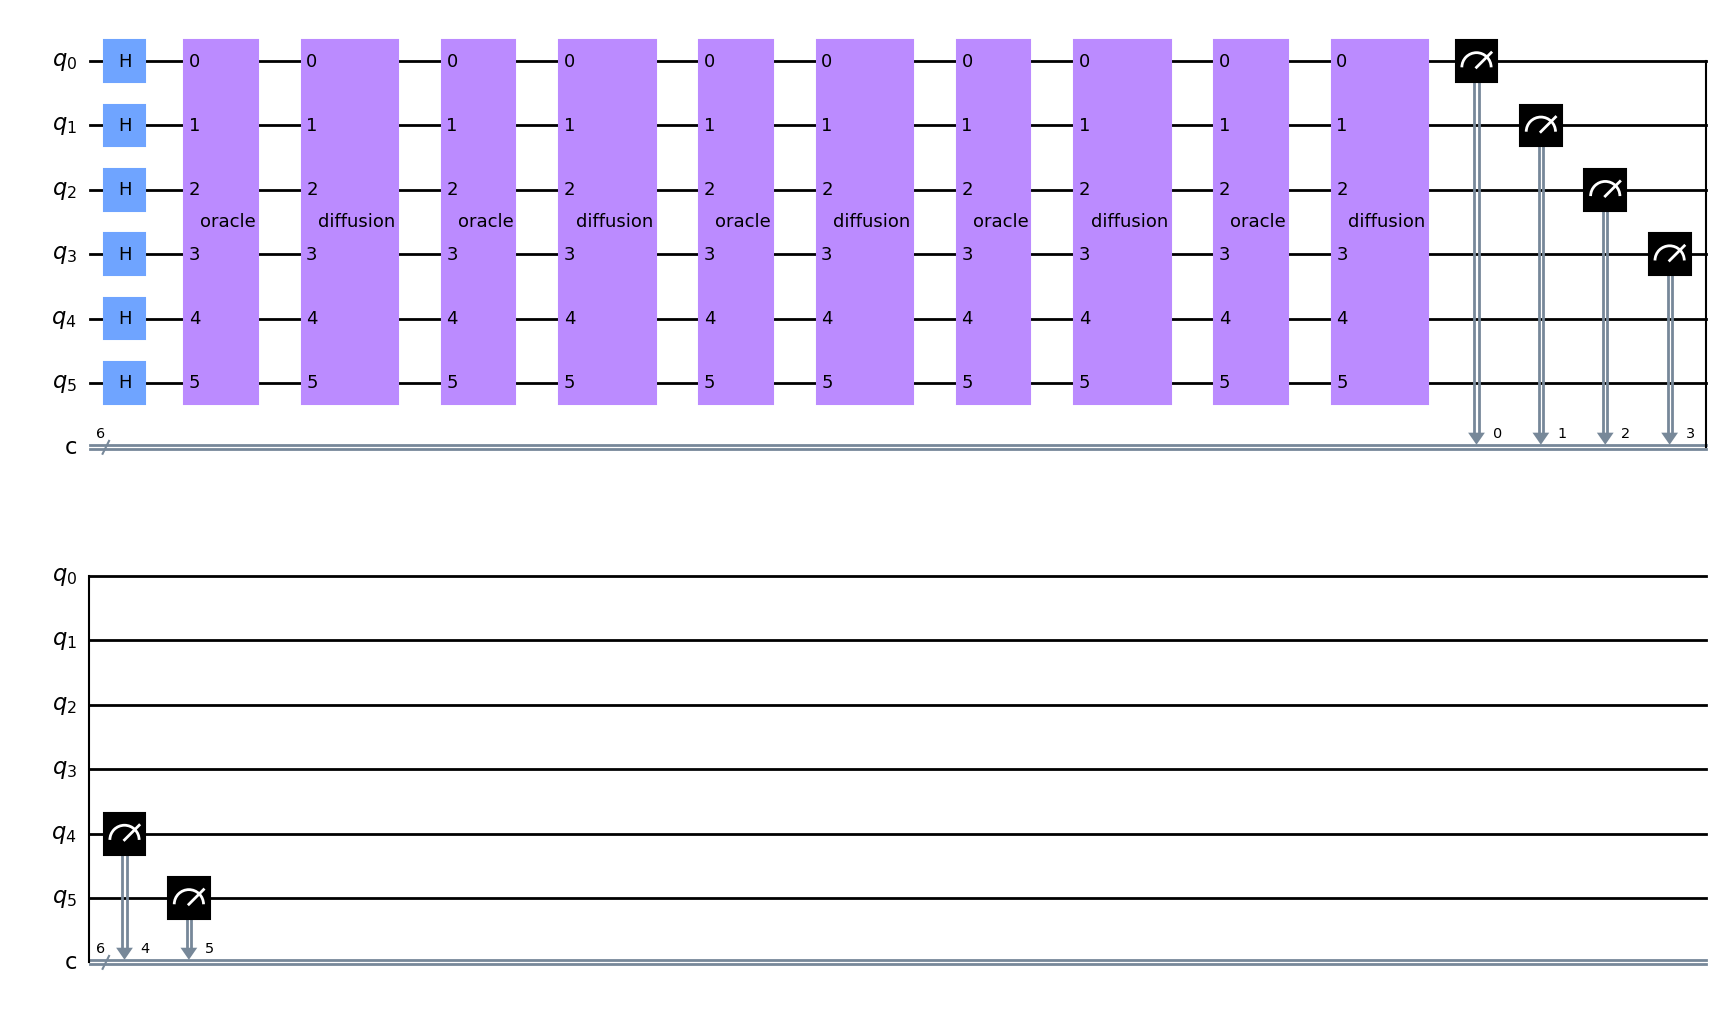

In [87]:
draw